In [1]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/home/gonzalo/git/NEMA-ml4floods/nema-floodmapper-2022.json"
# os.environ["GS_USER_PROJECT"] = "ml4cc-general"

In [2]:
from ml4floods.data import utils
from ml4floods.visualization import plot_utils
from ml4floods.data.ee_download import process_metadata
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
import matplotlib.pyplot as plt
from math import ceil



In [3]:
geojson_invalid = "gs://ml4floods_nema/0_DEV/1_Staging/operational/NEMA002/GRID13649/pre_post_products/postflood_2022-10-12_2022-10-25.geojson"
geojson_invalid = "gs://ml4floods_nema/0_DEV/1_Staging/operational/NEMA002/GRID13535/pre_post_products/postflood_2022-10-12_2022-10-25.geojson"
geojson_invalid = "gs://ml4floods_nema/0_DEV/1_Staging/operational/NEMA002/GRID13485/pre_post_products/postflood_2022-10-12_2022-10-25.geojson"
#     geojson_invalid = f"{path_to_aois}{aoi}/WF2_unet_rbgiswirs_vec/S2/2022-03-25.geojson"
floodmap = utils.read_geojson_from_gcp(geojson_invalid)
floodmap_crs = floodmap.to_crs("EPSG:4326")
if not floodmap_crs.is_valid.all():
    print(geojson_invalid)

gs://ml4floods_nema/0_DEV/1_Staging/operational/NEMA002/GRID13485/pre_post_products/postflood_2022-10-12_2022-10-25.geojson


In [4]:
floodmap.is_valid.all()

True

In [5]:
floodmap_crs.is_valid.all()

False

In [6]:
from shapely import validation
reasons_invalidity = [f"{validation.explain_validity(g)}\n" for g in floodmap_crs.geometry[~floodmap_crs.is_valid]]
print("".join(reasons_invalidity))

Self-intersection[146.714525380358 -41.8439918672176]
Self-intersection[146.722614973052 -41.9788033900434]
Too few points in geometry component[146.690258491883 -41.9553332393762]
Self-intersection[146.710673441868 -41.8701522202629]
Self-intersection[146.678183927114 -41.8128719522579]



(466, 3)
(466, 3)


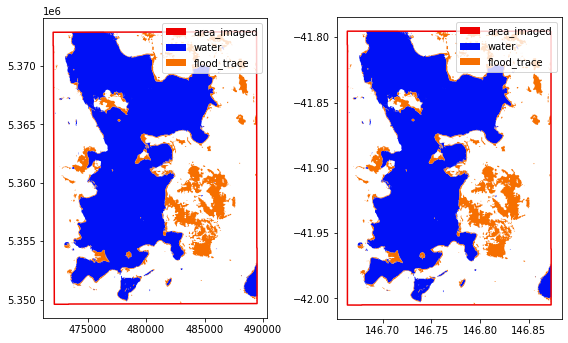

In [7]:
fig, ax = plt.subplots(1,2,figsize=(8,5),tight_layout=True)
plot_utils.plot_floodmap(floodmap,ax=ax[0])
print(floodmap.shape)
plot_utils.plot_floodmap(floodmap_crs,ax=ax[1])
print(floodmap_crs.shape)

In [8]:
from ml4floods.models import postprocess
floodmap_made_valid = postprocess.make_valid(floodmap_crs.copy())
floodmap_made_valid.is_valid.all()

True

In [9]:
(floodmap_made_valid.geom_type == "Polygon").all()

True

(466, 3)


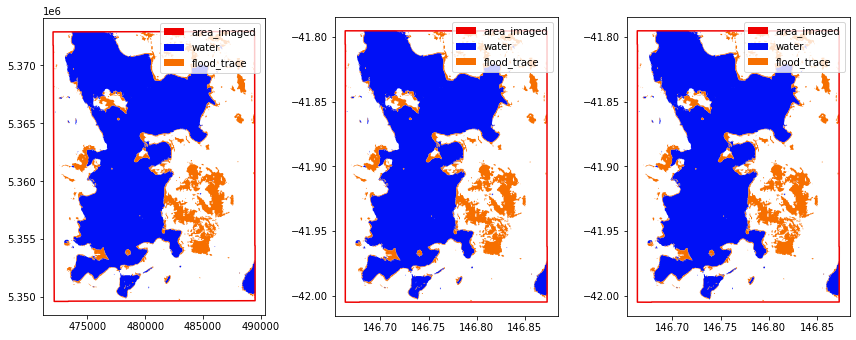

In [10]:
fig, ax = plt.subplots(1,3,figsize=(12,5),tight_layout=True)
plot_utils.plot_floodmap(floodmap,ax=ax[0])
plot_utils.plot_floodmap(floodmap_crs,ax=ax[1])
plot_utils.plot_floodmap(floodmap_made_valid,ax=ax[2])
print(floodmap_made_valid.shape)